In [38]:
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import wrangle
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [2]:
def acquire_global():
    df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
    df.dtypes
    return df
def prepare_global(df,k):
    df['year'] = pd.to_datetime( df['dt']).dt.year
    df['Fahrenheit'] = df.apply(lambda x: (9/5)*x['AverageTemperature']+32,axis=1)
    df['Fahrenheit_Uncertainty'] = df.apply(lambda x: (9/5)*x['AverageTemperatureUncertainty']+32,axis=1)
    col_list=['AverageTemperature','AverageTemperatureUncertainty','Fahrenheit','Fahrenheit_Uncertainty']
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df 
    

In [3]:
df=wrangle.acquire_global()

In [4]:
print(df.dtypes)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


In [5]:
df=wrangle.prepare_global(df,1.5)

In [6]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,year,Fahrenheit,Fahrenheit_Uncertainty
dt,,,,,,
1866-04-01,-23.151,2.029,Greenland,1866,-9.6718,35.6522
1866-06-01,-5.559,2.128,Greenland,1866,21.9938,35.8304
1866-07-01,-2.338,1.946,Greenland,1866,27.7916,35.5028
1866-08-01,-5.499,2.363,Greenland,1866,22.1018,36.2534
1866-09-01,-12.950,2.158,Greenland,1866,8.6900,35.8844


In [10]:
df.columns

Index(['year', 'Fahrenheit', 'Fahrenheit_Uncertainty'], dtype='object')

In [9]:
df = df.drop(columns=['AverageTemperature', 'AverageTemperatureUncertainty', 'Country'])

In [ ]:
df_cols = ['Date', 'Avg_temp', 'Avg_temp_uncertainty', 'County',
       'Year', 'Fahrenheit', 'Fahrenheit_Uncertainty']
df.columns = df_cols

In [54]:
df.nunique()

dt                               1611
AverageTemperature               1563
AverageTemperatureUncertainty    1091
Country                             1
year                              148
Fahrenheit                       1563
Fahrenheit_Uncertainty           1091
dtype: int64

In [53]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
year                             0
Fahrenheit                       0
Fahrenheit_Uncertainty           0
dtype: int64

In [9]:
df.Country.unique()

array(['Greenland'], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             1611 non-null   datetime64[ns]
 1   AverageTemperature             1611 non-null   float64       
 2   AverageTemperatureUncertainty  1611 non-null   float64       
 3   Country                        1611 non-null   object        
 4   year                           1611 non-null   int64         
 5   Fahrenheit                     1611 non-null   float64       
 6   Fahrenheit_Uncertainty         1611 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 88.2+ KB


# changing time into pd

In [47]:
df['year'] = pd.to_datetime( df['dt']).dt.year

In [49]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [52]:
#removed all the nulls
col_list=['AverageTemperature','AverageTemperatureUncertainty']
df = remove_outliers(df, 1.5, col_list) 

In [13]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,year,Fahrenheit,Fahrenheit_Uncertainty
dt,,,,,,
1866-04-01,-23.151,2.029,Greenland,1866,-9.6718,35.6522
1866-06-01,-5.559,2.128,Greenland,1866,21.9938,35.8304
1866-07-01,-2.338,1.946,Greenland,1866,27.7916,35.5028
1866-08-01,-5.499,2.363,Greenland,1866,22.1018,36.2534
1866-09-01,-12.950,2.158,Greenland,1866,8.6900,35.8844


In [56]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
year                             0
dtype: int64

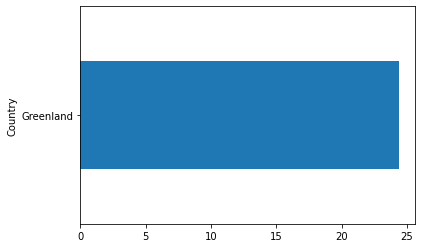

In [10]:
df.groupby(['Country'])['Fahrenheit'].last().sort_values().head(100).sort_values().plot(kind='barh');

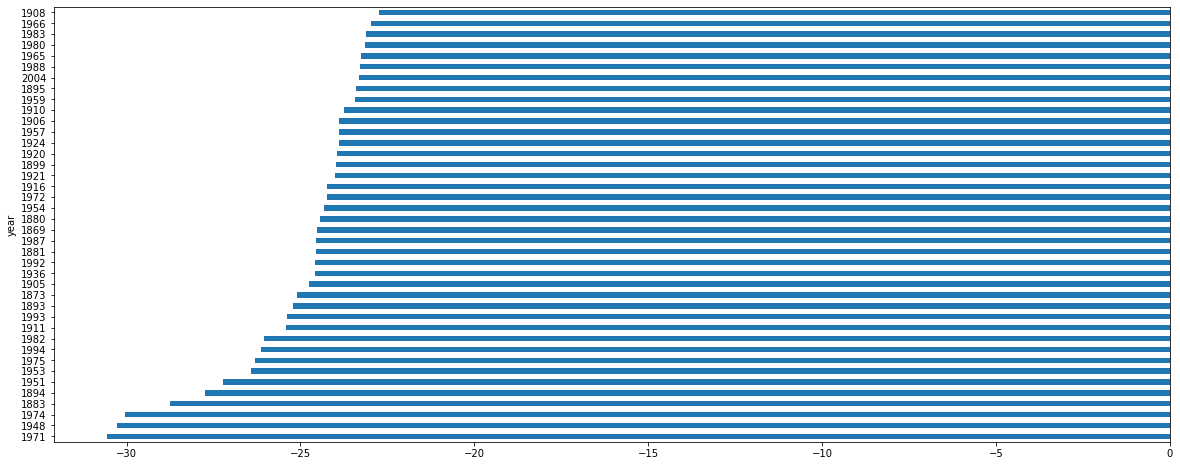

In [35]:
plt.figure(figsize=(20,8))
df.groupby(['year'])['Fahrenheit'].last().sort_values().head(40).plot(kind='barh');

In [84]:
df['Fahrenheit'] = df.apply(lambda x: (9/5)*x['AverageTemperature']+32,axis=1)

In [88]:
df['Fahrenheit_Uncertainty'] = df.apply(lambda x: (9/5)*x['AverageTemperatureUncertainty']+32,axis=1)

In [90]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Fahrenheit,Fahrenheit_Uncertainty
6,1744-05-01,6.702,1.789,Åland,1744,44.0636,35.2202
7,1744-06-01,11.609,1.577,Åland,1744,52.8962,34.8386
8,1744-07-01,15.342,1.410,Åland,1744,59.6156,34.5380
10,1744-09-01,11.702,1.517,Åland,1744,53.0636,34.7306
11,1744-10-01,5.477,1.862,Åland,1744,41.8586,35.3516


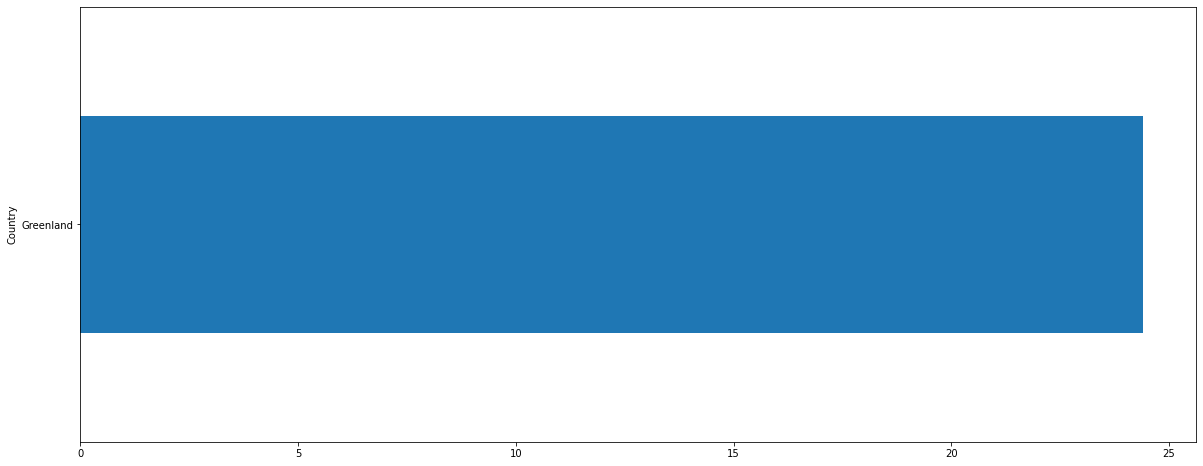

In [16]:
plt.figure(figsize=(20,8))
df.groupby(['Country'])['Fahrenheit'].last().sort_values().head(50).sort_values().plot(kind='barh');

<AxesSubplot:title={'center':'Temperature trend in Greenland'}, xlabel='year'>

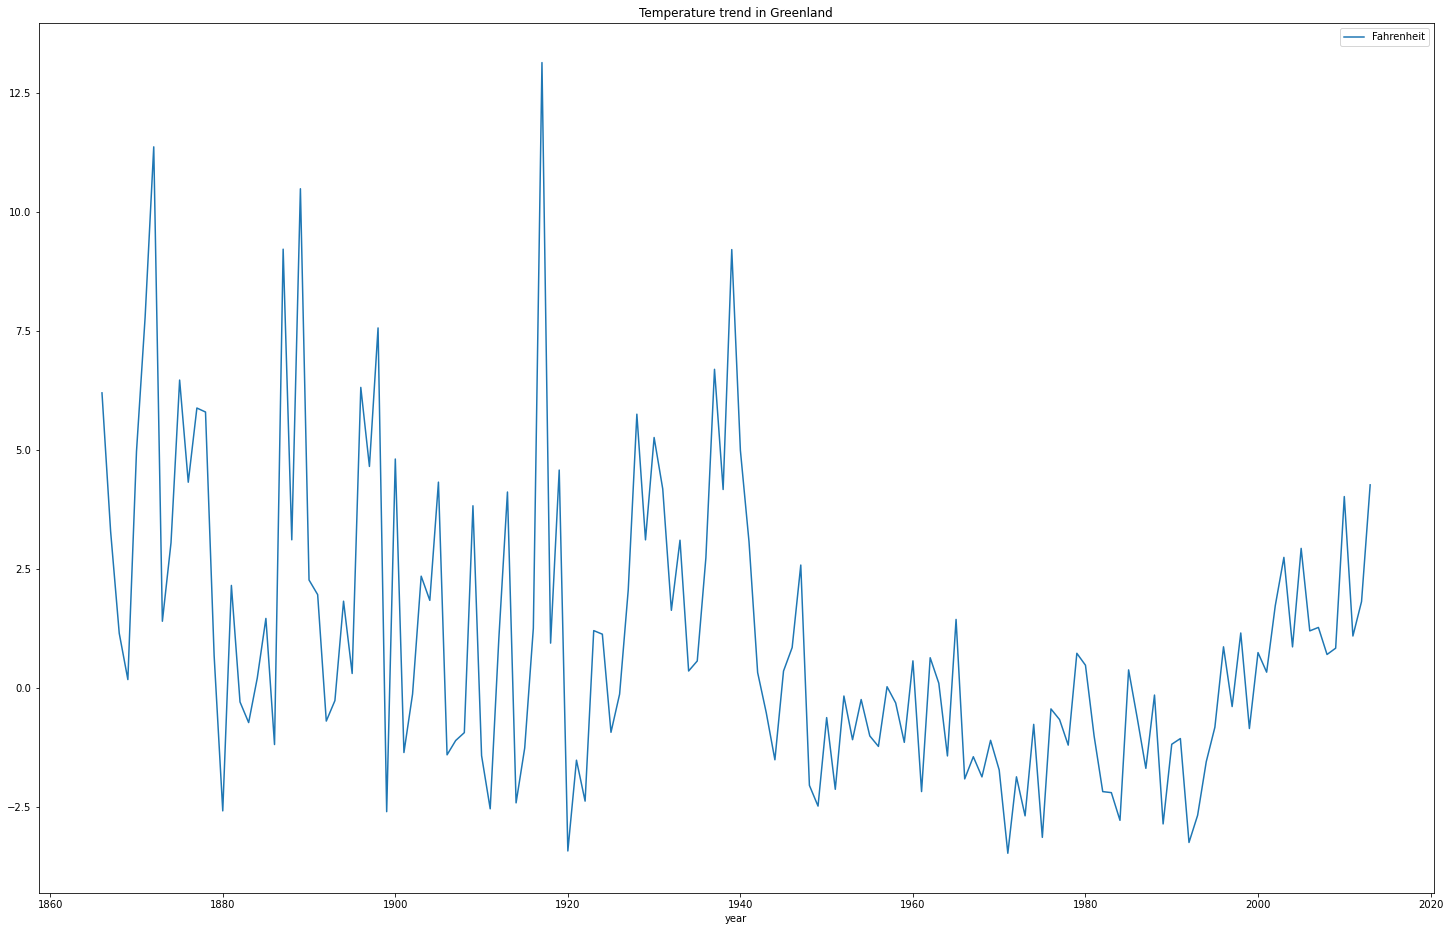

In [18]:
#greenaland mean temp per year 
india = df[df['Country']=='Greenland']
plt.rcParams["figure.figsize"] = (25,16)
new_Greenland = india.groupby('year')['Fahrenheit'].mean().reset_index()
new_Greenland.plot(kind='line', x='year', y='Fahrenheit', title='Temperature trend in Greenland')

<AxesSubplot:title={'center':'MaxTemperature trend in Greenland'}, xlabel='year'>

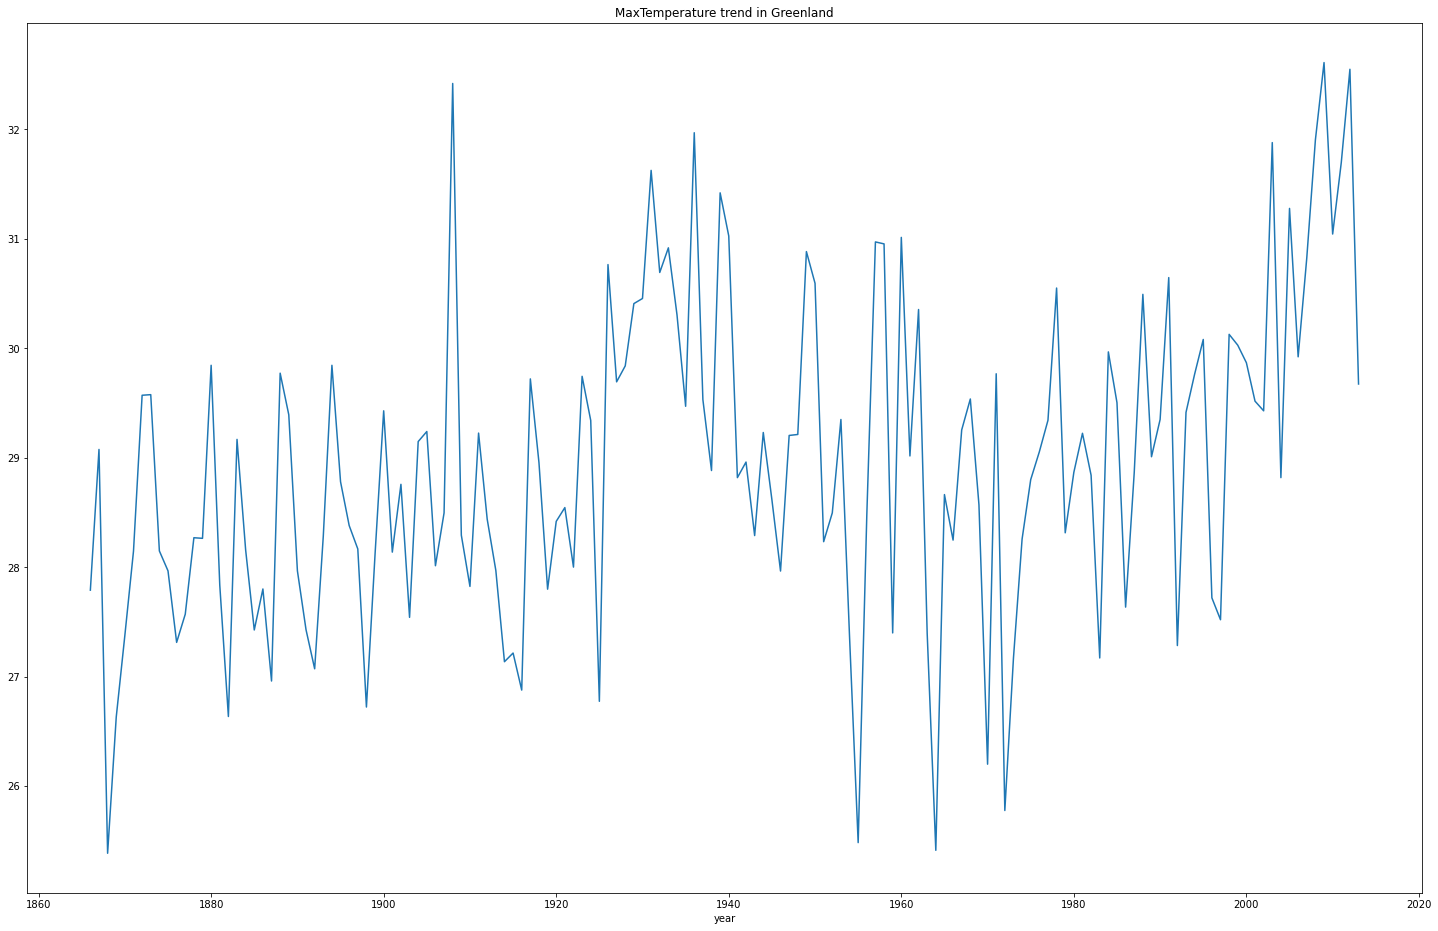

In [20]:
#max temp per year in greenland
Greenland = df[df['Country']=='Greenland']
plt.rcParams["figure.figsize"] = (25,16)
new_Greenland = Greenland.groupby('year')['Fahrenheit'].max()
new_Greenland.plot(kind='line', x='year', y='Fahrenheit', title='MaxTemperature trend in Greenland')

# spliting into train,val,test:

In [7]:
def split_timeseries(df):
    train_size = int(len(df) * .5)
    validate_size = int(len(df) * .3)
    test_size = int(len(df) - train_size - validate_size)
    validate_end_index = train_size + validate_size

    # split into train, validation, test
    train = df[: train_size]
    val = df[train_size : validate_end_index]
    test = df[validate_end_index : ]
    
    return train,val,test



In [8]:
train,val,test=split_timeseries(df)

In [9]:
train.shape,val.shape,test.shape

((805, 6), (483, 6), (323, 6))

In [10]:
train.tail()

,AverageTemperature,AverageTemperatureUncertainty,Country,year,Fahrenheit,Fahrenheit_Uncertainty
dt,,,,,,
1945-11-01,-25.702,1.231,Greenland,1945,-14.2636,34.2158
1945-12-01,-27.552,1.470,Greenland,1945,-17.5936,34.6460
1946-01-01,-28.749,1.060,Greenland,1946,-19.7482,33.9080
1946-02-01,-28.259,1.804,Greenland,1946,-18.8662,35.2472
1946-03-01,-26.648,1.343,Greenland,1946,-15.9664,34.4174


In [11]:
df.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'year', 'Fahrenheit', 'Fahrenheit_Uncertainty'],
      dtype='object')

In [12]:
df_cols = ['Date', 'Avg_temp', 'Avg_temp_uncertainty', 'County',
       'Year', 'Fahrenheit', 'Fahrenheit_Uncertainty']
df.columns = df_cols

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

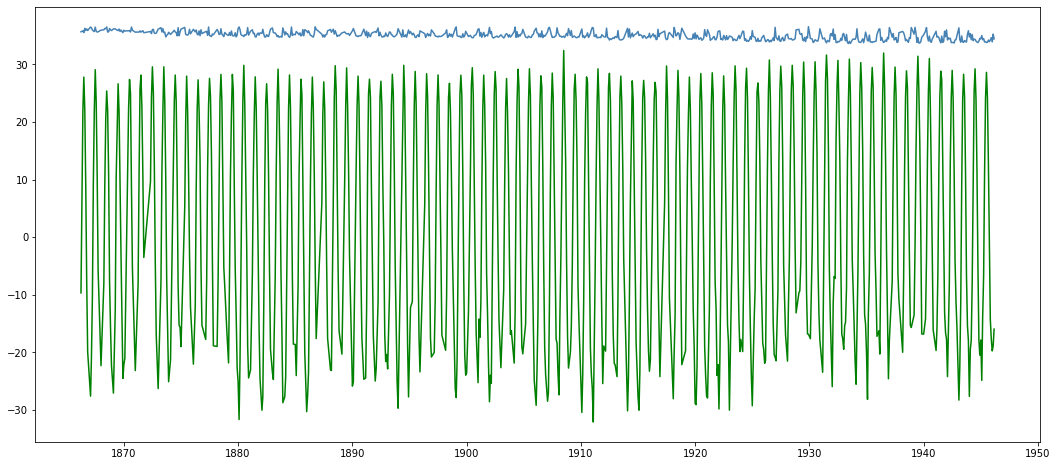

In [13]:
plt.figure(figsize=(18,8))
plt.plot(train['Fahrenheit'], label='A', color='green')
plt.plot(train['Fahrenheit_Uncertainty'], label='B', color='steelblue')


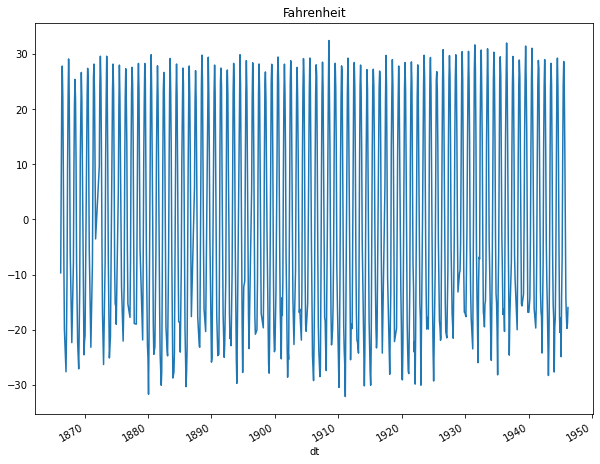

In [14]:
plt.figure(figsize=(10,8))
train.Fahrenheit.plot()
plt.title('Fahrenheit')
plt.show()

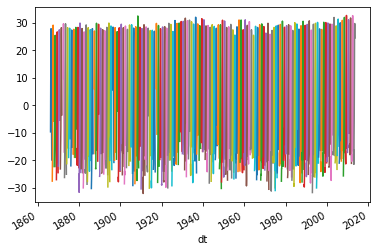

In [15]:
df.resample('Y').Fahrenheit.plot()
plt.rcParams["figure.figsize"] = (25,16)
plt.show()

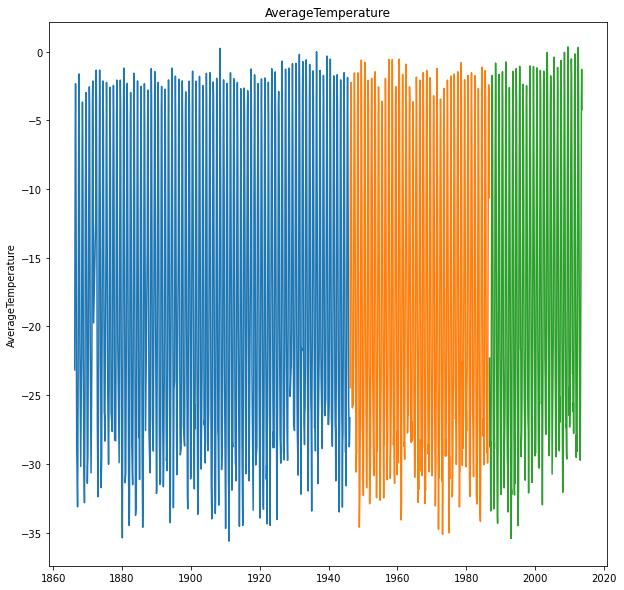

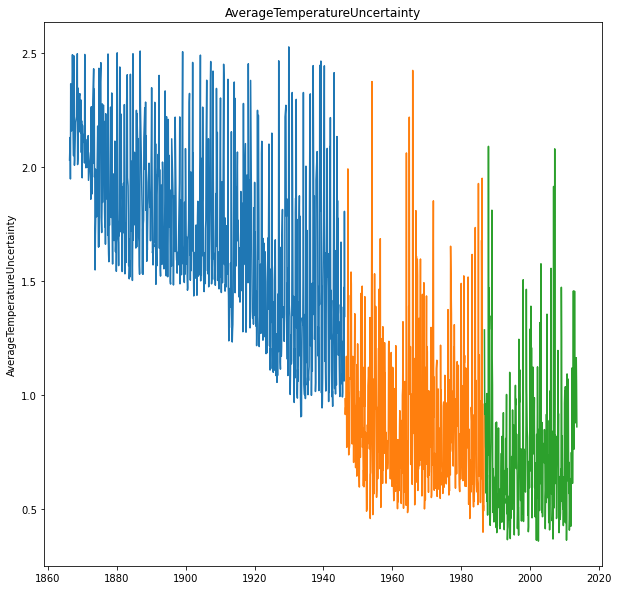

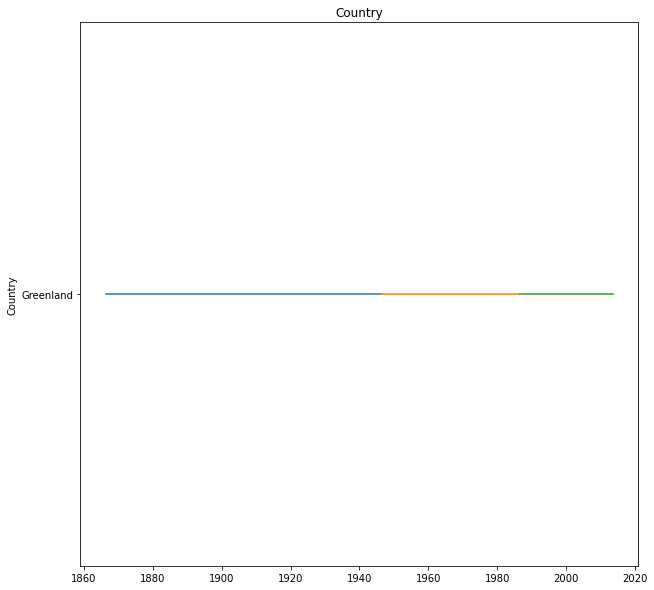

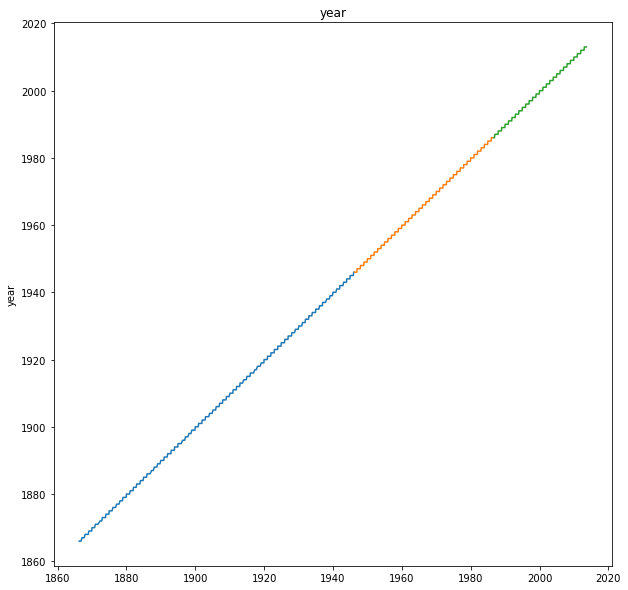

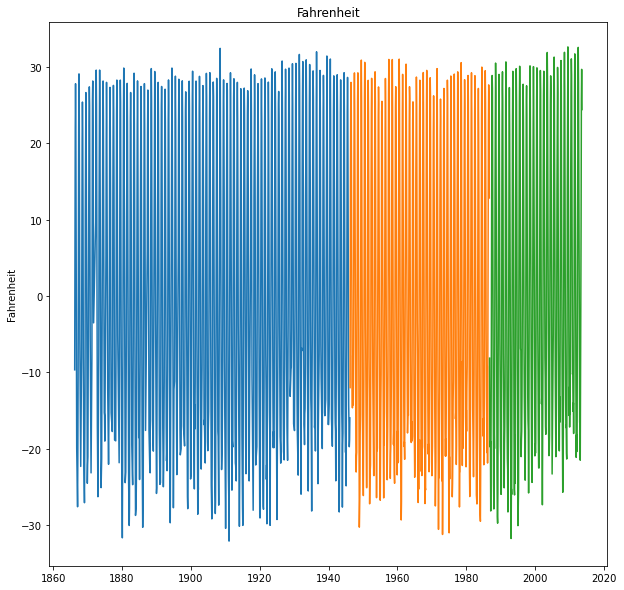

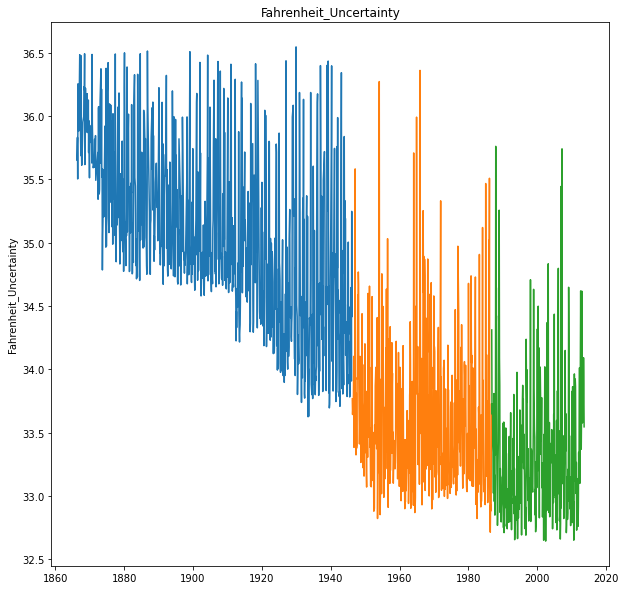

In [16]:
for col in train.columns:
    plt.figure(figsize=(10,10))
    plt.plot(train[col])
    plt.plot(val[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [26]:
def evaluate(target_var, validate, yhat):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(mean_squared_error(validate[target_var], yhat[target_var], squared=False), 0)
    return rmse


def plot_and_eval(target_var, train, validate, yhat, title):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat[target_var], label='Prediction', linewidth=1)
    plt.title(title)
    rmse = evaluate(target_var, validate, yhat)
    plt.legend()
    plt.show()
    
    
def append_eval_df(model_type, target_var, eval_df, validate, yhat):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var, validate, yhat)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)
train = train[['Fahrenheit']]
validate = validate[['Fahrenheit']]
test = test[['Fahrenheit']]

In [23]:
Fahrenheit = train['Fahrenheit'][-1:][0]
Fahrenheit_Uncertainty= round(train['Fahrenheit_Uncertainty'][-1:][0],2)

yhat_df = pd.DataFrame({'Fahrenheit': [Fahrenheit], 'Fahrenheit_Uncertainty': [Fahrenheit_Uncertainty]}, 
                       index = val.index)

yhat_df.head(2)


,Fahrenheit,Fahrenheit_Uncertainty
dt,,
1946-04-01,-15.9664,34.42
1946-05-01,-15.9664,34.42


In [24]:
plot_and_eval()

TypeError: plot_and_eval() missing 4 required positional arguments: 'train', 'validate', 'yhat', and 'title'

In [25]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)
    

TypeError: append_eval_df() missing 3 required positional arguments: 'eval_df', 'validate', and 'yhat'

# simple avg

In [24]:
Fahrenheit = round(train['Fahrenheit'].mean(), 2)
Fahrenheit_Uncertainty = round(train['Fahrenheit_Uncertainty'].mean(), 2)


yhat_df = pd.DataFrame({'Fahrenheit': [Fahrenheit],
                            'Fahrenheit_Uncertainty': [Fahrenheit_Uncertainty],
                           }, index = val.index)

yhat_df.head(3)


,Fahrenheit,Fahrenheit_Uncertainty
dt,,
1946-04-01,1.82,35.02
1946-05-01,1.82,35.02
1946-06-01,1.82,35.02


Fahrenheit -- RMSE: 19


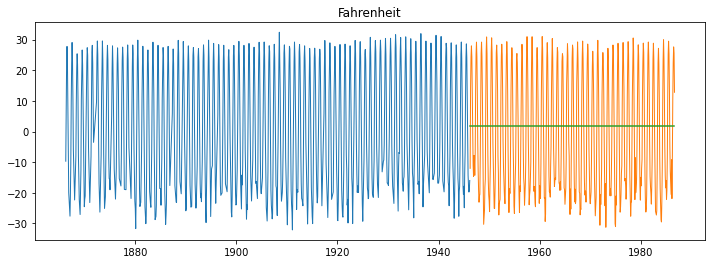

Fahrenheit_Uncertainty -- RMSE: 2


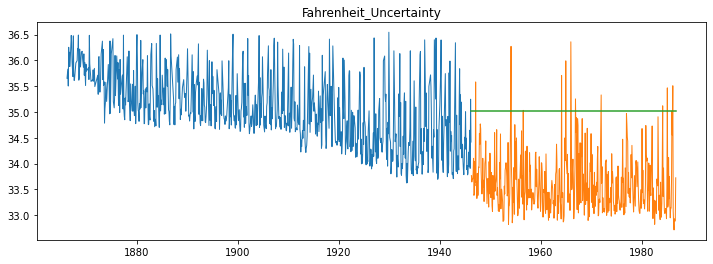

In [25]:
for col in yhat_df.columns:
    plot_and_eval(col)


In [26]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df


KeyError: 'year'

# Moving avg:


In [18]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

Fahrenheit = round(train['Fahrenheit'].rolling(period).mean().iloc[-1], 2)
Fahrenheit_Uncertainty = round(train['Fahrenheit_Uncertainty'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'Fahrenheit': [Fahrenheit],
                            'Fahrenheit_Uncertainty': [Fahrenheit_Uncertainty],
                           }, index = val.index)
yhat_df.head(2)


,Fahrenheit,Fahrenheit_Uncertainty
dt,,
1946-04-01,-3.61,34.39
1946-05-01,-3.61,34.39


Fahrenheit -- RMSE: 19


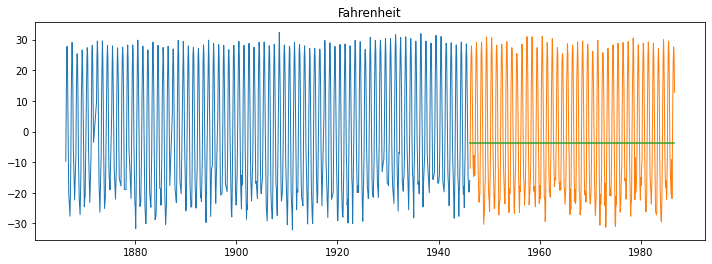

Fahrenheit_Uncertainty -- RMSE: 1


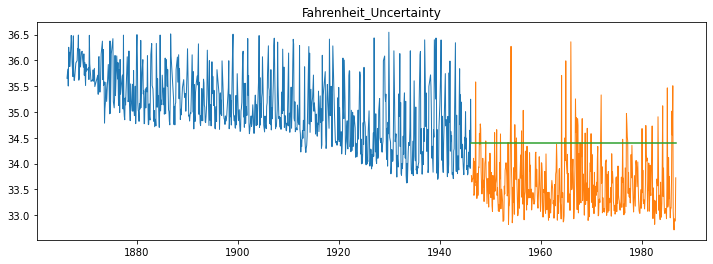

In [19]:
for col in yhat_df.columns:
    plot_and_eval(col)


In [20]:
periods = [1, 4, 12, 26, 52, 104]

for p in periods:
    items = round(train['Fahrenheit'].rolling(p).mean().iloc[-1], 2)
    dollars = round(train['Fahrenheit_Uncertainty'].rolling(p).mean().iloc[-1], 2)

    yhat_df = pd.DataFrame({'Fahrenheit': [items],
                            'Fahrenheit_Uncertainty': [dollars],
                           }, index = val.index)

    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'Fahrenheit'
                            )
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'Fahrenheit_Uncertainty'
                            )



In [21]:
eval_df


,model_type,target_var,rmse
0,last_observed_value,Fahrenheit,25.0
1,last_observed_value,Fahrenheit_Uncertainty,1.0
2,simple_average,Fahrenheit,19.0
3,simple_average,Fahrenheit_Uncertainty,2.0
4,1d moving average,Fahrenheit,25.0
5,1d moving average,Fahrenheit_Uncertainty,1.0
6,4d moving average,Fahrenheit,26.0
7,4d moving average,Fahrenheit_Uncertainty,1.0
8,12d moving average,Fahrenheit,19.0
9,12d moving average,Fahrenheit_Uncertainty,1.0


Fahrenheit -- RMSE: 19


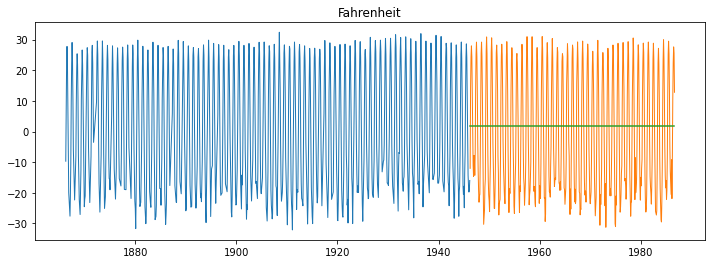

Fahrenheit_Uncertainty -- RMSE: 1


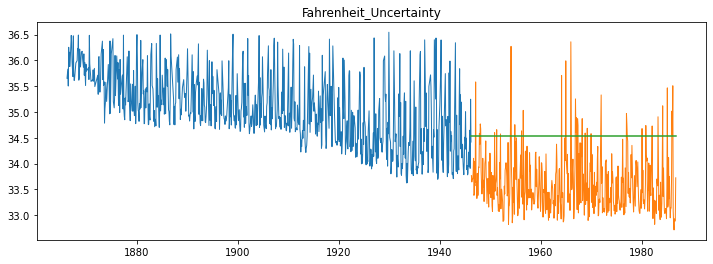

In [23]:
for col in yhat_df.columns:
    plot_and_eval(target_var = col)


In [26]:
# get the min rmse for each variable

min_rmse_dollars_sold = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_items_sold = eval_df.groupby('target_var')['rmse'].min()[1]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_dollars_sold) | 
         (eval_df.rmse == min_rmse_items_sold)
        )]


,model_type,target_var,rmse
1,last_observed_value,Fahrenheit_Uncertainty,1.0
2,simple_average,Fahrenheit,19.0
5,1d moving average,Fahrenheit_Uncertainty,1.0
7,4d moving average,Fahrenheit_Uncertainty,1.0
8,12d moving average,Fahrenheit,19.0
9,12d moving average,Fahrenheit_Uncertainty,1.0
10,26d moving average,Fahrenheit,19.0
11,26d moving average,Fahrenheit_Uncertainty,1.0
12,52d moving average,Fahrenheit,19.0
13,52d moving average,Fahrenheit_Uncertainty,1.0


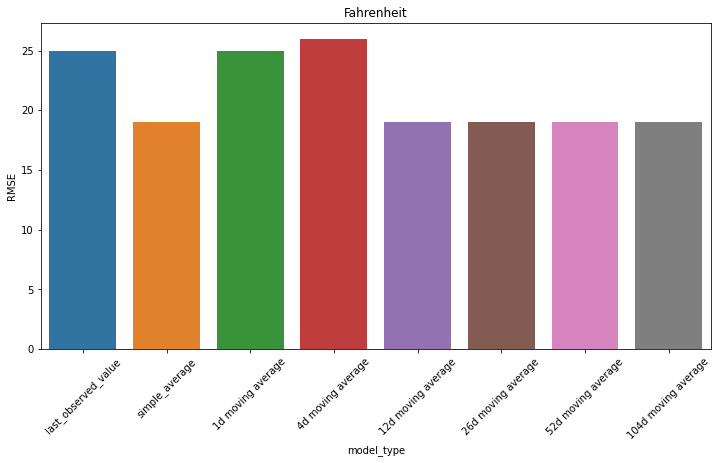

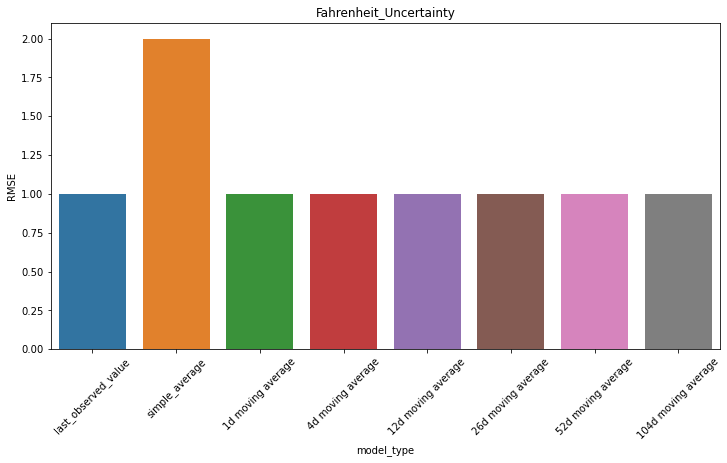

In [28]:
for col in yhat_df.columns:
    x = eval_df[eval_df.target_var == col]['model_type']
    y = eval_df[eval_df.target_var == col]['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title(col)
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.show()


In [34]:
yhat_df = val + train.diff(365).mean()
yhat_df.index = test.index


TypeError: unsupported operand type(s) for -: 'str' and 'str'